(duality)=
# Duality
 
 
 
```{figure} https://raw.githubusercontent.com/meta-llama/llama3/refs/heads/main/Llama3_Repo.jpeg
---
width: 70%
height: 70%
---
Pattern recognition and speculation are instinctive and vestigual aspects of our complex neural, endocrine, and immune systems.
```

 



 

 

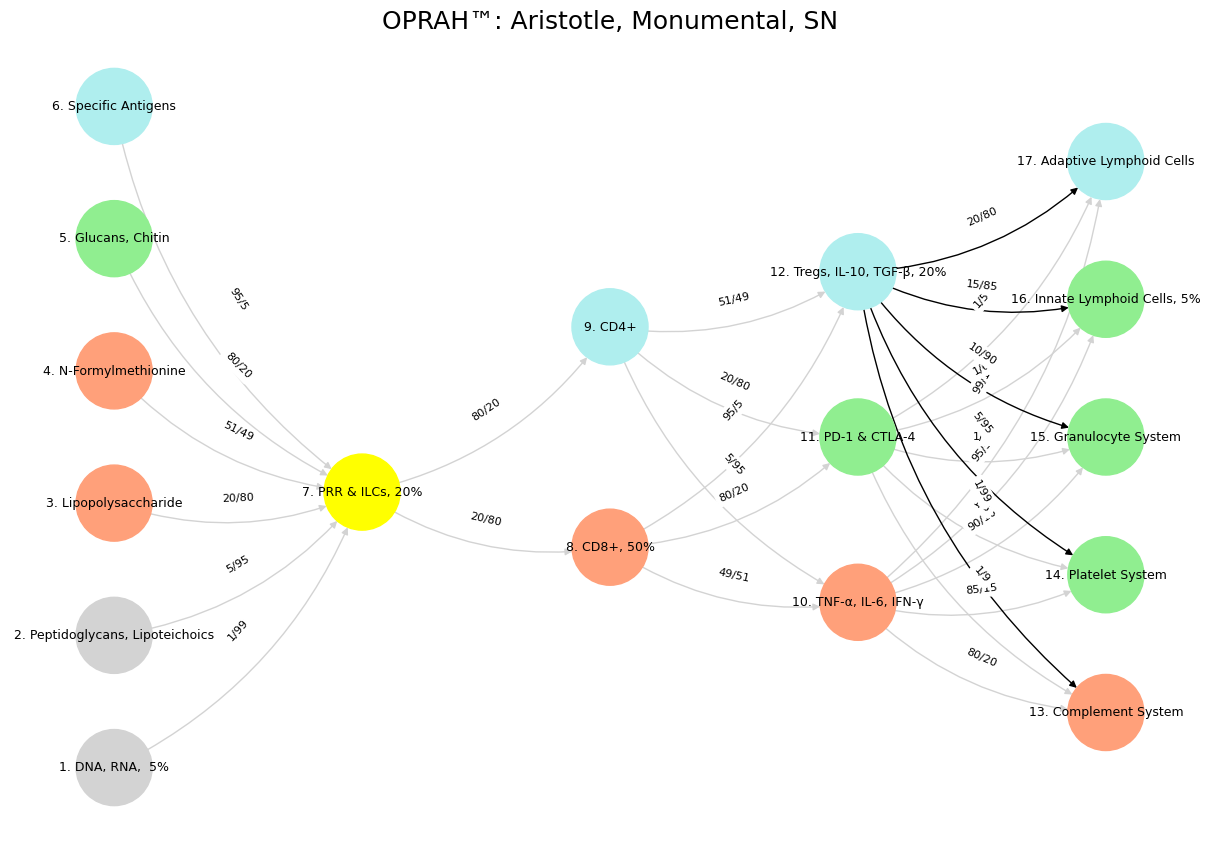

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers
def define_layers():
    return {
        'Suis': ['DNA, RNA,  5%', 'Peptidoglycans, Lipoteichoics', 'Lipopolysaccharide', 'N-Formylmethionine', "Glucans, Chitin", 'Specific Antigens'],
        'Voir': ['PRR & ILCs, 20%'],  
        'Choisis': ['CD8+, 50%', 'CD4+'],  
        'Deviens': ['TNF-α, IL-6, IFN-γ', 'PD-1 & CTLA-4', 'Tregs, IL-10, TGF-β, 20%'],  
        "M'èléve": ['Complement System', 'Platelet System', 'Granulocyte System', 'Innate Lymphoid Cells, 5%', 'Adaptive Lymphoid Cells']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['PRR & ILCs, 20%'],  
        'paleturquoise': ['Specific Antigens', 'CD4+', 'Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'],  
        'lightgreen': ["Glucans, Chitin", 'PD-1 & CTLA-4', 'Platelet System', 'Innate Lymphoid Cells, 5%', 'Granulocyte System'],  
        'lightsalmon': ['Lipopolysaccharide', 'N-Formylmethionine', 'CD8+, 50%', 'TNF-α, IL-6, IFN-γ', 'Complement System'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('DNA, RNA,  5%', 'PRR & ILCs, 20%'): '1/99',
        ('Peptidoglycans, Lipoteichoics', 'PRR & ILCs, 20%'): '5/95',
        ('Lipopolysaccharide', 'PRR & ILCs, 20%'): '20/80',
        ('N-Formylmethionine', 'PRR & ILCs, 20%'): '51/49',
        ("Glucans, Chitin", 'PRR & ILCs, 20%'): '80/20',
        ('Specific Antigens', 'PRR & ILCs, 20%'): '95/5',
        ('PRR & ILCs, 20%', 'CD8+, 50%'): '20/80',
        ('PRR & ILCs, 20%', 'CD4+'): '80/20',
        ('CD8+, 50%', 'TNF-α, IL-6, IFN-γ'): '49/51',
        ('CD8+, 50%', 'PD-1 & CTLA-4'): '80/20',
        ('CD8+, 50%', 'Tregs, IL-10, TGF-β, 20%'): '95/5',
        ('CD4+', 'TNF-α, IL-6, IFN-γ'): '5/95',
        ('CD4+', 'PD-1 & CTLA-4'): '20/80',
        ('CD4+', 'Tregs, IL-10, TGF-β, 20%'): '51/49',
        ('TNF-α, IL-6, IFN-γ', 'Complement System'): '80/20',
        ('TNF-α, IL-6, IFN-γ', 'Platelet System'): '85/15',
        ('TNF-α, IL-6, IFN-γ', 'Granulocyte System'): '90/10',
        ('TNF-α, IL-6, IFN-γ', 'Innate Lymphoid Cells, 5%'): '95/5',
        ('TNF-α, IL-6, IFN-γ', 'Adaptive Lymphoid Cells'): '99/1',
        ('PD-1 & CTLA-4', 'Complement System'): '1/9',
        ('PD-1 & CTLA-4', 'Platelet System'): '1/8',
        ('PD-1 & CTLA-4', 'Granulocyte System'): '1/7',
        ('PD-1 & CTLA-4', 'Innate Lymphoid Cells, 5%'): '1/6',
        ('PD-1 & CTLA-4', 'Adaptive Lymphoid Cells'): '1/5',
        ('Tregs, IL-10, TGF-β, 20%', 'Complement System'): '1/99',
        ('Tregs, IL-10, TGF-β, 20%', 'Platelet System'): '5/95',
        ('Tregs, IL-10, TGF-β, 20%', 'Granulocyte System'): '10/90',
        ('Tregs, IL-10, TGF-β, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('Tregs, IL-10, TGF-β, 20%', 'Complement System'): '1/99',
        ('Tregs, IL-10, TGF-β, 20%', 'Platelet System'): '5/95',
        ('Tregs, IL-10, TGF-β, 20%', 'Granulocyte System'): '10/90',
        ('Tregs, IL-10, TGF-β, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™: Aristotle, Monumental, SN", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_Dynamic Capability_. The monumental will align adversarial TNF-α, IL-6, IFN-γ with antigens from pathogens of "ancient grudge", a new mutiny with antiquarian roots. But it will also tokenize PD-1 & CTLA-4 with specific, emergent antigens, while also reappraising "self" to ensure no rogue viral and malignant elements remain unnoticéd.
```



In [ ]:
import pygame
import sys
import random

# Initialize Pygame
pygame.init()

# Constants
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
PADDLE_WIDTH = 20
PADDLE_HEIGHT = 100
BALL_SIZE = 20
BRICK_WIDTH = 40
BRICK_HEIGHT = 20
BRICK_COLUMNS = 5
BRICK_ROWS = 30  # 600 / 20 = 30 rows to span screen height
PADDLE_SPEED = 5
BALL_SPEED = 5
TARGET_SCORE = 50

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 100, 100)
GREEN = (100, 255, 100)
BLUE = (100, 100, 255)

# Set up display
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Break-Pong")
clock = pygame.time.Clock()

# Paddle class
class Paddle:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.width = PADDLE_WIDTH
        self.height = PADDLE_HEIGHT
        self.speed = PADDLE_SPEED

    def move(self, up=True):
        if up:
            self.y -= self.speed
        else:
            self.y += self.speed
        # Keep paddle within screen bounds
        self.y = max(0, min(SCREEN_HEIGHT - self.height, self.y))

    def draw(self):
        pygame.draw.rect(screen, WHITE, (self.x, self.y, self.width, self.height))

# Ball class
class Ball:
    def __init__(self):
        self.reset()
        self.size = BALL_SIZE

    def move(self):
        self.x += self.vel_x
        self.y += self.vel_y

    def reset(self):
        self.x = SCREEN_WIDTH // 2
        self.y = SCREEN_HEIGHT // 2
        self.vel_x = random.choice([-1, 1]) * BALL_SPEED
        self.vel_y = random.choice([-1, 1]) * BALL_SPEED
        self.last_hit = None  # Tracks which paddle last hit the ball

    def draw(self):
        pygame.draw.circle(screen, WHITE, (int(self.x), int(self.y)), self.size // 2)

# Brick class
class Brick:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.width = BRICK_WIDTH
        self.height = BRICK_HEIGHT
        self.color = random.choice([RED, GREEN, BLUE])
        self.intact = True

    def draw(self):
        if self.intact:
            pygame.draw.rect(screen, self.color, (self.x, self.y, self.width, self.height))

# Particle class for visual effects
class Particle:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.size = random.randint(2, 5)
        self.vel_x = random.uniform(-2, 2)
        self.vel_y = random.uniform(-2, 2)
        self.life = 30  # Frames until particle disappears
        self.color = random.choice([RED, GREEN, BLUE])

    def update(self):
        self.x += self.vel_x
        self.y += self.vel_y
        self.life -= 1

    def draw(self):
        if self.life > 0:
            alpha = int((self.life / 30) * 255)  # Fade out effect
            surface = pygame.Surface((self.size, self.size), pygame.SRCALPHA)
            pygame.draw.circle(surface, (*self.color, alpha), (self.size // 2, self.size // 2), self.size // 2)
            screen.blit(surface, (int(self.x), int(self.y)))

# Collision detection functions
def ball_collides_with_paddle(ball, paddle):
    return (ball.x - ball.size // 2 < paddle.x + paddle.width and
            ball.x + ball.size // 2 > paddle.x and
            ball.y - ball.size // 2 < paddle.y + paddle.height and
            ball.y + ball.size // 2 > paddle.y)

def ball_collides_with_brick(ball, brick):
    if not brick.intact:
        return False
    return (ball.x - ball.size // 2 < brick.x + brick.width and
            ball.x + ball.size // 2 > brick.x and
            ball.y - ball.size // 2 < brick.y + brick.height and
            ball.y + ball.size // 2 > brick.y)

# Initialize game objects
left_paddle = Paddle(50, SCREEN_HEIGHT // 2 - PADDLE_HEIGHT // 2)
right_paddle = Paddle(SCREEN_WIDTH - 50 - PADDLE_WIDTH, SCREEN_HEIGHT // 2 - PADDLE_HEIGHT // 2)
ball = Ball()

# Create central brick wall
bricks = []
brick_start_x = SCREEN_WIDTH // 2 - (BRICK_COLUMNS * BRICK_WIDTH) // 2
for col in range(BRICK_COLUMNS):
    for row in range(BRICK_ROWS):
        bricks.append(Brick(brick_start_x + col * BRICK_WIDTH, row * BRICK_HEIGHT))

# Scores and particles
left_score = 0
right_score = 0
particles = []

# Game loop
running = True
while running:
    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Paddle movement
    keys = pygame.key.get_pressed()
    if keys[pygame.K_w]:
        left_paddle.move(up=True)
    if keys[pygame.K_s]:
        left_paddle.move(up=False)
    if keys[pygame.K_UP]:
        right_paddle.move(up=True)
    if keys[pygame.K_DOWN]:
        right_paddle.move(up=False)

    # Update ball
    ball.move()

    # Ball collisions with top/bottom walls
    if ball.y - ball.size // 2 <= 0 or ball.y + ball.size // 2 >= SCREEN_HEIGHT:
        ball.vel_y = -ball.vel_y

    # Ball collisions with paddles
    if ball_collides_with_paddle(ball, left_paddle):
        ball.vel_x = abs(ball.vel_x)  # Ensure ball moves right
        ball.last_hit = 'left'
    elif ball_collides_with_paddle(ball, right_paddle):
        ball.vel_x = -abs(ball.vel_x)  # Ensure ball moves left
        ball.last_hit = 'right'

    # Ball collisions with bricks
    for brick in bricks:
        if ball_collides_with_brick(ball, brick):
            brick.intact = False
            ball.vel_x = -ball.vel_x
            # Add particles
            for _ in range(5):
                particles.append(Particle(brick.x + brick.width // 2, brick.y + brick.height // 2))
            # Award points
            if ball.last_hit == 'left':
                left_score += 1
            elif ball.last_hit == 'right':
                right_score += 1

    # Ball off screen
    if ball.x - ball.size // 2 <= 0:
        right_score += 5
        ball.reset()
    elif ball.x + ball.size // 2 >= SCREEN_WIDTH:
        left_score += 5
        ball.reset()

    # Update particles
    for particle in particles[:]:
        particle.update()
        if particle.life <= 0:
            particles.remove(particle)

    # Draw everything
    screen.fill(BLACK)
    for brick in bricks:
        brick.draw()
    left_paddle.draw()
    right_paddle.draw()
    ball.draw()
    for particle in particles:
        particle.draw()

    # Draw scores
    font = pygame.font.Font(None, 36)
    left_text = font.render(f"Left: {left_score}", True, WHITE)
    right_text = font.render(f"Right: {right_score}", True, WHITE)
    screen.blit(left_text, (50, 20))
    screen.blit(right_text, (SCREEN_WIDTH - 150, 20))

    # Check for game over
    if left_score >= TARGET_SCORE or right_score >= TARGET_SCORE:
        winner = "Left" if left_score >= TARGET_SCORE else "Right"
        game_over_text = font.render(f"{winner} Wins!", True, WHITE)
        screen.blit(game_over_text, (SCREEN_WIDTH // 2 - 50, SCREEN_HEIGHT // 2))
        pygame.display.flip()
        pygame.time.wait(3000)
        running = False

    pygame.display.flip()
    clock.tick(60)

# Cleanup
pygame.quit()
sys.exit()

SystemExit: 

: 